# Q1)
Extract the ROI (region of interest) time series data for each condition (EO and EC) using the MNI152 template (you could use any Atlas file such as msdl that uses MNI coordinates) and then plot the corresponding time series data from a random ROI in both conditions. Discuss the similarities and differences in plotted time series data.

In [1]:
# Import the requred Packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib

fmri_file = '../../datasets/fMRI/HW4/sub-001_ses-001_task-eoec_bold.nii.gz' # Get the nifti file
img = nib.load(fmri_file) # Load in the nifti file
print(type(img)) # Print the type of the img variable (should be nifti)
print(img.shape) # Print the dimensions of the object

<class 'nibabel.nifti1.Nifti1Image'>
(64, 64, 35, 120)


## Import Masker & Atlas
To get the ROI time series data from the whole fMRI dataset.

In [ ]:
# Load the required Packages
import nilearn as nl
import numpy as np
# Retrieve the atlas and the data
from nilearn import datasets
# Fetch the atlas file.
atlas = datasets.fetch_atlas_msdl()
# Loading the the Probabilistic atlas image
atlas_filename = atlas['maps']
# Loading the list containing the labels of the regions
labels = atlas['labels']
# Extract time series
data = img.get_fdata() # Get the 4 dimentional data from the fMRI
# import maskers
from nilearn.maskers import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=5) # get masker from atlas
time_series = masker.fit_transform(img) # get time series from fMRI fitted with the given masker

[NiftiMapsMasker.wrapped] loading regions from None
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min


/home/joshua/.local/lib/python3.10/site-packages/nilearn/maskers/base_masker.py:253: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  return self.transform_single_imgs(


[Memory]0.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


## Split EO (Eyes Open) & EC (Eyes Closed) data 
into 2 different time series arrays at ROI index 9.

In [8]:
# Timing table (onset, duration, trial_type) fitted to the timed intervals (120)
timing_info = [
    (0, 10, "EC"), (10, 10, "EO"), (20, 10, "EC"), (30, 10, "EO"),
    (40, 10, "EC"), (50, 10, "EO"), (60, 10, "EC"), (70, 10, "EO"),
    (80, 10, "EC"), (90, 10, "EO"), (100, 10, "EC"), (110, 10, "EO")
]

# Initialize masks
ec_mask = np.zeros(120, dtype=bool)  # For EC condition
eo_mask = np.zeros(120, dtype=bool)  # For EO condition

# Create masking indecies for EC and EO
for onset, duration, trial_type in timing_info:
    if trial_type == "EC":
        ec_mask[onset:onset + duration] = True
    elif trial_type == "EO":
        eo_mask[onset:onset + duration] = True

# Apply masks to the 4D fMRI data
ec_data = data[..., ec_mask]  # EC condition data
eo_data = data[..., eo_mask]  # EO condition data

# Get random ROI (region of interest)
roi_time_series = time_series[:, 9]  # Full time series for the selected ROI index: 9
roi_ec_time_series = roi_time_series[ec_mask]  # Time series for EC condition
roi_eo_time_series = roi_time_series[eo_mask]  # Time series for EO condition


## Plot time series of EO and EC
at ROI index 9.

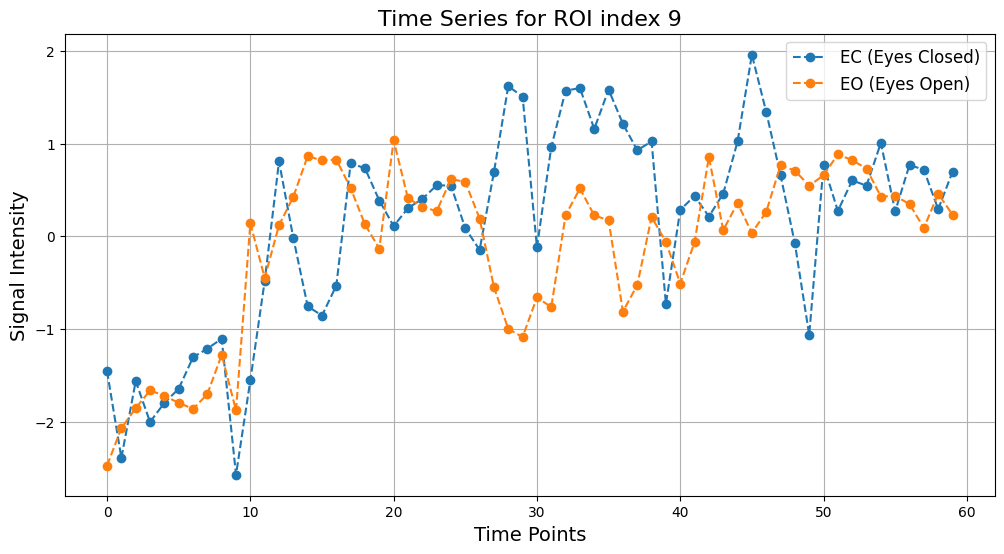

In [9]:
# Plot the time series
plt.figure(figsize=(12, 6))

# Plot EC condition
plt.plot(roi_ec_time_series, label="EC (Eyes Closed)", marker="o", linestyle="--")

# Plot EO condition
plt.plot(roi_eo_time_series, label="EO (Eyes Open)", marker="o", linestyle="--")

plt.title(f"Time Series for ROI index {9}", fontsize=16) # Title for plot
plt.xlabel("Time Points", fontsize=14) # x-axis label
plt.ylabel("Signal Intensity", fontsize=14) # y-axis label 
plt.legend(fontsize=12) # plot legend
plt.grid(True) # show grid lines
plt.show() # show plot


## Time Series Plot Analysis

In the plot above the orange line represents EO (eyes open) & the blue line represents EC (eyes closed). From what we can see both of them are corralated to eachother at around the same time ranges. From time points 0 to 10 both EO and EC are relatively lower in amplitude compared to average, while in time points 30 to 40 both EO and EC are relatively higher in amplitude compared to average. 

However it seems like this ROI (region of interest) on index 9, the EC has higher amplitude on averge compared to EO. One example of this is clearly shown from time points 30 to 40, and mostly the case from time points 50 to 60.

## Location of ROI index 9

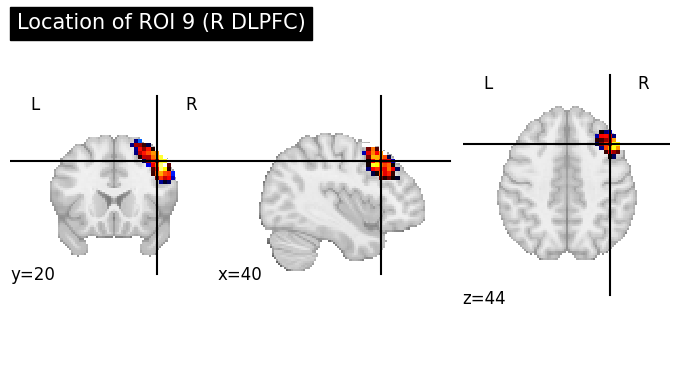

In [ ]:
# Import the requred Packages
from nilearn import image, plotting
import numpy as np

# Load the atlas image
atlas_img = image.load_img(atlas_filename)

# Extract the 3D map corresponding to the selected ROI
roi_img = image.index_img(atlas_img, 9)

# Plot the ROI location
plotting.plot_stat_map(
    roi_img,
    title=f"Location of ROI {9} ({labels[9]})",
    display_mode="ortho",  # Orthogonal view
    draw_cross=True,
    annotate=True,
    colorbar=False,
)
plotting.show()

## Location of ROI index 9 Analysis

It seems that this ROI is locatied near the frontal lobe on the right side of the brain. This could explain why the EC has more activation than the EO here because the frontal lobe is primarly responsible for cognitive tasks. If the person is not using as much brain power on visual processing because their eyes are closed, this might leave more room for thinking about what the person just saw, hence the uptick in amplitude in this ROI in the frontal lobe section when the eyes are closed.